In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [4]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
number_companies = pd.Series([1000,900,150])
pd.DataFrame({ 'City name': city_names, 'Population': population, 'Number of Companies': number_companies })

,City name,Number of Companies,Population
0,San Francisco,1000,852469
1,San Jose,900,1015785
2,Sacramento,150,485199


In [5]:
california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e0ccc18>]],
      dtype=object)

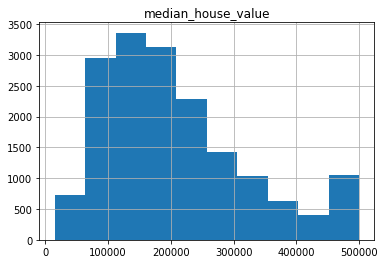

In [9]:
# Graphing the histogram for an specific column 
california_housing_dataframe.hist('median_house_value')

In [20]:
# How to access values on the data frame
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [22]:
print(type(cities['City name'][1]))
cities['City name'][0]

<class 'str'>


'San Francisco'

In [23]:
print(type(cities[0:2]))
cities[1:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
1,San Jose,1015785


In [24]:
#Manipulating information
population/1000

0     852.469
1    1015.785
2     485.199
dtype: float64

In [25]:
# Using numpy function
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [26]:
# Passing to the Series (columns) an alpha function from numpy
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [31]:
cities_bool = cities
cities_bool['population_high'] = pd.Series( population.apply(lambda val: val > 1000000)) 
cities_bool 

,City name,Population,Area square miles,Population density,population_high
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


In [30]:
#Modifying DataFrames is also straightforward. 
#For example, the following code adds two Series to an existing DataFrame:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


In [33]:
#Modify the cities table by adding a new boolean column that is True if and only if both of the following are True:
#The city is named after a saint.
#The city has an area greater than 50 square miles.
#Note: Boolean Series are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing logical and, use & instead of and.
#Hint: "San" in Spanish means "saint."
cities['excercise']= (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,population_high,excercise
0,San Francisco,852469,46.87,18187.945381,False,False
1,San Jose,1015785,176.53,5754.177760,True,True
2,Sacramento,485199,97.92,4955.055147,False,False


In [37]:
#Both Series and DataFrame objects also define an index property that 
#assigns an identifier value to each Series item or DataFrame row.
#By default, at construction, pandas assigns index values that 
#reflect the ordering of the source data. Once created, the index 
#values are stable; that is, they do not change when data is reordered.

city_names.index

RangeIndex(start=0, stop=3, step=1)

In [39]:
#Call DataFrame.reindex to manually reorder the rows. 
#For example, the following has the same effect as 
#sorting by city name:
cities
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,population_high,excercise
2,Sacramento,485199,97.92,4955.055147,False,False
0,San Francisco,852469,46.87,18187.945381,False,False
1,San Jose,1015785,176.53,5754.177760,True,True


In [40]:
#Reindexing is a great way to shuffle (randomize) a DataFrame. 
#In the example below, we take the index, which is array-like, 
#and pass it to NumPy's random.permutation function, which 
#shuffles its values in place. Calling reindex with this 
#shuffled array causes the DataFrame rows to be shuffled in the same way. 
#Try running the following cell multiple times!
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,population_high,excercise
0,San Francisco,852469,46.87,18187.945381,False,False
2,Sacramento,485199,97.92,4955.055147,False,False
1,San Jose,1015785,176.53,5754.177760,True,True


In [41]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,population_high,excercise
0,San Francisco,852469.0,46.87,18187.945381,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False,False
